# MBTI - Myers Briggs Type Indicator

## Libraries

In [1]:
import pandas as pd
import plotly.express as px

## Data import

In [2]:
df = pd.read_csv('./mbti_data.csv')
df.head()

,type,posts
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...
1,ENTP,'I'm finding the lack of me in these posts ver...
2,INTP,'Good one _____ https://www.youtube.com/wat...
3,INTJ,"'Dear INTP, I enjoyed our conversation the o..."
4,ENTJ,'You're fired.|||That's another silly misconce...


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8675 entries, 0 to 8674
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   type    8675 non-null   object
 1   posts   8675 non-null   object
dtypes: object(2)
memory usage: 135.7+ KB


## Data preprocessing

Let's analyze one raw of the dataset.

In [4]:
df.loc[10,:]

type                                                  INFJ
posts    'One time my parents were fighting over my dad...
Name: 10, dtype: object

In [5]:
df.loc[10, 'posts']

"'One time my parents were fighting over my dad's affair and my dad pushed my mom. The fall broke her finger.  She's pointed a gun at him and made him get on his knees and beg for his life. She's...|||I'm gonna talk about what a piece of shit my dad is now.  He's an alcoholic and he has some kind of serious mental problem when it comes to complying with the IRS. (In his words, Laws don't apply...|||OMG...at the women's center I lived at, run by a Catholic charity, the fat bully program manager took it upon herself to change policy so that tenants were FORCED to attend the Christmas party. If...|||I don't work, but I have a calling I am 100% committed to 24/7 with no vacation or off days EVER. I'm a Kundalini mystic.  Oh, I don't get paid, either!  It's one of those destined things...|||My art teacher in high school had a stack of art school catalogs. When I saw the one for the school I ended up going to, I immediately knew that was the one. Without any research. It was like when...|||I

We can see that each post is separated by "|||".
<br>Let's transform each string by an array of strings.

In [6]:
tmp = df.loc[10, 'posts']
tmp_arr = tmp.split('|||')
#tmp_arr

Better for the future. Let's apply this to all the dataset.

In [7]:
df['posts'] = df['posts'].apply(lambda row : row.split('|||'))

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8675 entries, 0 to 8674
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   type    8675 non-null   object
 1   posts   8675 non-null   object
dtypes: object(2)
memory usage: 135.7+ KB


## Data exploration

Let's see the distribution of the column 'type'.

In [26]:
type_counts = df['type'].value_counts().rename_axis('types').reset_index(name='counts')
#type_counts

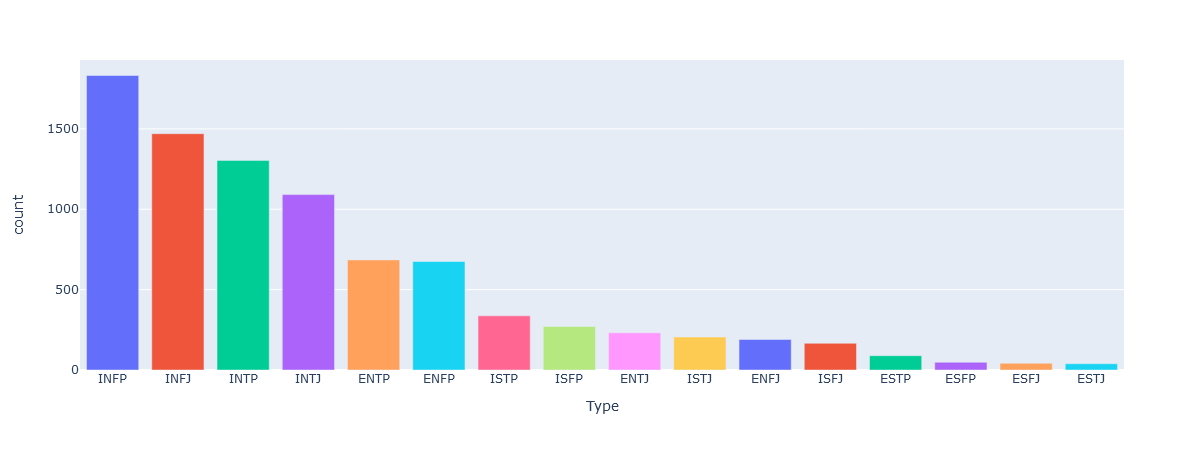

In [28]:
x = type_counts['types']
y = type_counts['counts']

fig = px.bar(x=x, y=y, labels={'x':'Type', 'y':'count'}, color=x)
fig.update_layout(showlegend=False)
fig.show()

Let's see the top words for each type.